<a href="https://colab.research.google.com/github/jagdishdatascintist/jagdish_aiml/blob/main/disaster_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Table of Contents
1. Exploratory Data Analysis
2. Text Preprocessing - Part I
3. Feature Engineering
4. Text Preprocessing - Part II
5. Model Building
6. Model Evaluation
7. Final Model Selection

In [ ]:
# import the libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re, string
import nltk
import spacy
import warnings
warnings.filterwarnings('ignore')

In [ ]:


from google.colab import drive
drive.mount('/content/drive')

train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
sample_df=pd.read_csv('sample_submission.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# check train_df
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# check the shape
train_df.shape

(7613, 5)

In [ ]:
# check the missing data
train_df.isnull().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


In [ ]:
# check the duplicated data
train_df.duplicated().sum()

0

In [ ]:
# check the duplicated data
train_df['keyword'].duplicated().sum()

7391

In [ ]:
train_df['location'].duplicated().sum()

4271

In [ ]:
train_df['text'].duplicated().sum()

110

In [ ]:
# check test_df
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# check the shape
test_df.shape

(3263, 4)

In [ ]:
# check the missing data
test_df.isnull().sum()

,0
id,0
keyword,26
location,1105
text,0


In [ ]:
# check the duplicated data
test_df.duplicated().sum()

0

In [ ]:
test_df['keyword'].duplicated().sum()

3041

In [ ]:
test_df['location'].duplicated().sum()

1660

In [ ]:
test_df['text'].duplicated().sum()

20

In [ ]:
# check test_df
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# check the shape
test_df.shape

(3263, 4)

In [ ]:
# check the missing data
test_df.isnull().sum()

,0
id,0
keyword,26
location,1105
text,0


In [ ]:
# check the duplicated data
test_df.duplicated().sum()

0

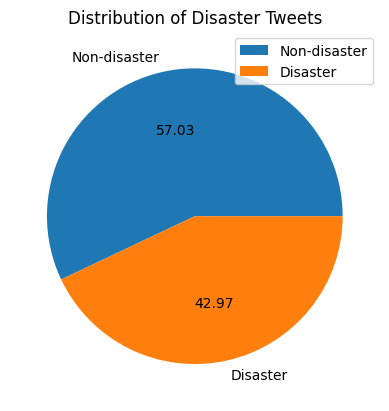

In [ ]:
import matplotlib.pyplot as plt

plt.pie(train_df['target'].value_counts(), labels=['Non-disaster', 'Disaster'], autopct='%0.2f')
plt.legend()  # Adds a legend
plt.title('Distribution of Disaster Tweets')  # Adds a descriptive title
plt.show()

In [ ]:

# set the random state
random_state = 4041

# import the wordcloud library
from wordcloud import WordCloud

# concat all the text for each labels
non_disaster_text = [''.join(t) for t in train_df[train_df['target']==0]['text']]
non_disaster_strings = ' '.join(map(str, non_disaster_text))
disaster_text = [''.join(t) for t in train_df[train_df['target']==1]['text']]
disaster_strings = ' '.join(map(str, disaster_text))

# generate word clouds
non_disaster_cloud = WordCloud(width=800, height=400, max_words=500, background_color='white', random_state=random_state).generate(non_disaster_strings)
disaster_cloud = WordCloud(width=800, height=400, max_words=500, random_state=random_state).generate(disaster_strings)

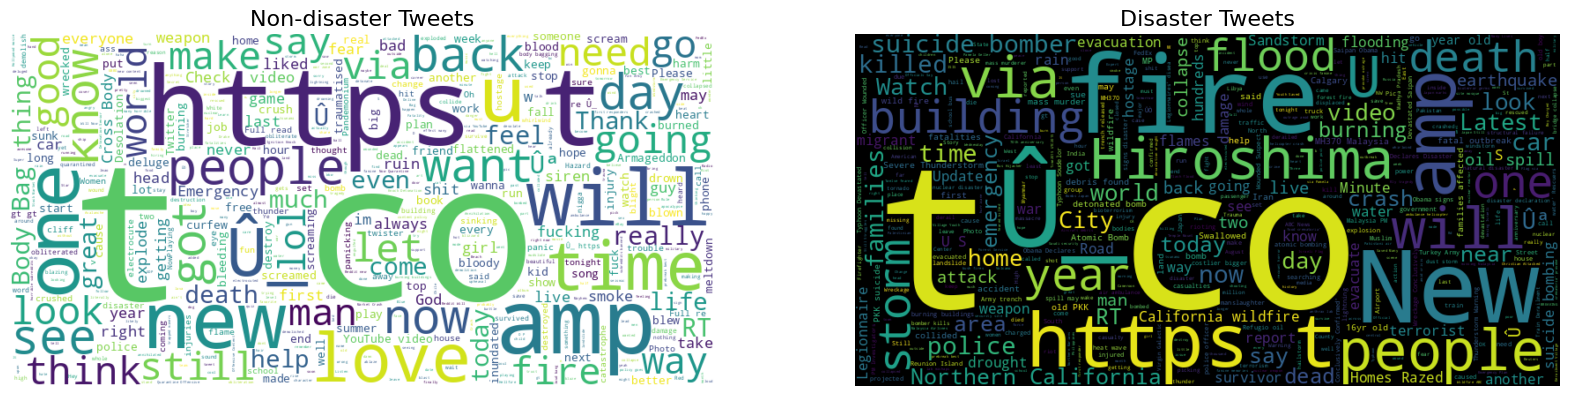

In [ ]:
# create subplots for the generated clouds
fig, axes = plt.subplots(1, 2, figsize = (20,20))
axes[0].imshow(non_disaster_cloud, interpolation='bilinear')
axes[1].imshow(disaster_cloud, interpolation='bilinear')

# turn the axis off
[ax.axis('off') for ax in axes]

# add titles
axes[0].set_title('Non-disaster Tweets', fontsize=16)
axes[1].set_title('Disaster Tweets', fontsize=16)

# show the figure
plt.show()

Remove URLs



```
# This is formatted as code
```



In [ ]:
# define a function that removes URLs from the text
def remove_url(text):
    text = re.sub(r'((?:https?|ftp|file)://[-\w\d+=&@#/%?~|!:;\.,]*)', '', text)
    return text

# remove URLs from the text and show the modified text in a new column
train_df['text_cleaned'] = train_df['text'].apply(remove_url)
test_df['text_cleaned'] = test_df['text'].apply(remove_url)

Remove HTML tags

In [ ]:
# define a function that removes HTML tags
def remove_HTML(text):
    text = re.sub(r'<.*?>', '', text)
    return text

# remove HTML tags
train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_HTML)
test_df['text_cleaned'] = test_df['text_cleaned'].apply(remove_HTML)

Remove Character References¶


In [ ]:
# define a function to remove character references (e.g., &lt;, &amp;, &nbsp;)
def remove_references(text):
    text = re.sub(r'&[a-zA-Z]+;?', '', text)
    return text

# remove character references
train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_references)
test_df['text_cleaned'] = test_df['text_cleaned'].apply(remove_references)

Remove Non-printable Characters


In [ ]:
# check which characters are printable (ASCII)
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [ ]:
# define a function that removes non-printable characters
def remove_non_printable(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

# remove non-printable characters
train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_non_printable)
test_df['text_cleaned'] = test_df['text_cleaned'].apply(remove_non_printable)

#Remove Numeric Values
Remove numeric values, including mixtures of alphabetical characters and numeric values such as 'M194', '5km'.

In [ ]:
# define a function that removes numeric values and mixtures
def remove_num(text):
    text = re.sub(r'\w*\d+\w*', '', text)
    return text

# remove numeric values and mixtures
train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_num)
test_df['text_cleaned'] = test_df['text_cleaned'].apply(remove_num)

In [ ]:
# check the results
train_df.tail()

,id,keyword,location,text,target,text_cleaned
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,@aria_ahrary @TheTawniest The out of control w...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,. [: UTC]? S of Volcano Hawaii.
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an e-bike collided ...
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1,The Latest: More Homes Razed by Northern Calif...


In [ ]:
# check the results
test_df.tail()

,id,keyword,location,text,text_cleaned
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,EARTHQUAKE SAFETY LOS ANGELES SAFETY FASTENER...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,Storm in RI worse than last hurricane. My har...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,Green Line derailment in Chicago
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,MEG issues Hazardous Weather Outlook (HWO)
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...,#CityofCalgary has activated its Municipal Eme...


# Feature Engineering
Below are 10 features we're going to create:

- Number of sentences
- Number of words
- Number of characters
- Number of hashtags
- Number of mentions
- Number of all caps words
- Average length of words
- Number of proper nouns (PROPN)
- Number of non-proper nouns (NOUN)
- Percentage of characters that are punctuation

# Number of Sentences¶


In [ ]:

import nltk
nltk.download('punkt_tab')

# create a new feature for the number of sentences in each Tweet
train_df['sent_count'] = train_df['text'].apply(nltk.tokenize.sent_tokenize).apply(len)
test_df['sent_count'] = test_df['text'].apply(nltk.tokenize.sent_tokenize).apply(len)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# create a new feature for the number of words
train_df['word_count'] = train_df['text'].apply(nltk.tokenize.word_tokenize).apply(len)
test_df['word_count'] = test_df['text'].apply(nltk.tokenize.word_tokenize).apply(len)

# Number of Characters¶


In [ ]:
# create a new feature for the number of characters excluding white spaces
train_df['char_count'] = train_df['text'].apply(lambda x: len(x) - x.count(" "))
test_df['char_count'] = test_df['text'].apply(lambda x: len(x) - x.count(" "))

# Number of Hashtags¶


In [ ]:
# define a function that returns the number of hashtags in a string
def hash_count(string):
    words = string.split()
    hashtags = [w for w in words if w.startswith('#')]
    return len(hashtags)

# create a new feature for the number of hashtags
train_df['hash_count'] = train_df['text'].apply(hash_count)
test_df['hash_count'] = test_df['text'].apply(hash_count)

# Number of Mentions¶


In [ ]:
# define a function that returns the number of mentions in a string
def ment_count(string):
    words = string.split()
    mentions = [w for w in words if w.startswith('@')]
    return len(mentions)

# create a new feature for the number of mentions
train_df['ment_count'] = train_df['text'].apply(ment_count)
test_df['ment_count'] = test_df['text'].apply(ment_count)

# Number of All Caps Words¶


In [ ]:
import re

def all_caps_count(string):
    words = string.split()
    pattern = re.compile(r'\b[A-Z]{2,}\b')  # Matches words with 2 or more consecutive uppercase letters
    caps_words = [word for word in words if pattern.fullmatch(word)]
    return len(caps_words)

# Average Length of words¶


In [ ]:
# define a function that returns the average length of words
def avg_word_len(string):
    words = string.split()
    total_len = sum([len(words[i]) for i in range(len(words))])
    avg_len = round(total_len / len(words), 2)
    return avg_len

# create a new feature for the average length of words
train_df['avg_word_len'] = train_df['text'].apply(avg_word_len)
test_df['avg_word_len'] = test_df['text'].apply(avg_word_len)

In [ ]:

import nltk
nltk.download('averaged_perceptron_tagger_eng')

# define a function using nltk that returns the number of proper nouns in the text
def propn_count_nltk(text):
    tokens = nltk.word_tokenize(text)
    tagged = [token for token in nltk.pos_tag(tokens)]
    propn_count = len([token for (token, tag) in tagged if tag == 'NNP' or tag == 'NNPS'])
    return propn_count

# create a new feature for the number of proper nouns
train_df['propn_count_nltk'] = train_df['text'].apply(propn_count_nltk)
test_df['propn_count_nltk'] = test_df['text'].apply(propn_count_nltk)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [ ]:
# check the results
train_df[['id', 'text', 'text_cleaned', 'propn_count_nltk']].head()

,id,text,text_cleaned,propn_count_nltk
0,1,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this #earthquake M...,4
1,4,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada,5
2,5,All residents asked to 'shelter in place' are ...,All residents asked to 'shelter in place' are ...,0
3,6,"13,000 people receive #wildfires evacuation or...",", people receive #wildfires evacuation orders ...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby #Alaska as ...,2


In [ ]:
# test how nltk worked with the first text
string = "Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all"
print([(token, tag) for (token, tag) in nltk.pos_tag(nltk.word_tokenize(string)) if tag == 'NNP'])

[('Reason', 'NNP'), ('May', 'NNP'), ('ALLAH', 'NNP'), ('Forgive', 'NNP')]


In [ ]:

# test how nltk works with the first text after lowercasing it
string = "Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all"
print([(token, tag) for (token, tag) in nltk.pos_tag(nltk.word_tokenize(string.lower())) if tag == 'NNP'])

[]


In [ ]:
# load the model
nlp = spacy.load('en_core_web_sm')

# check the same string with spaCy
string = "Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all"
print([(token.text, token.pos_) for token in nlp(string) if token.pos_=='PROPN'])

[('Reason', 'PROPN'), ('ALLAH', 'PROPN')]


In [ ]:
# define a function that returns number of proper nouns with spaCy
def propn_count(text, model=nlp):
    doc = model(text)
    pos = [token.pos_ for token in doc]
    return pos.count('PROPN')

# create a new feature for numbers of proper nouns
train_df['propn_count'] = train_df['text'].apply(propn_count)
test_df['propn_count'] = test_df['text'].apply(propn_count)

In [ ]:
# remove 'propn_count_nltk' columns
train_df = train_df.drop(['propn_count_nltk'], axis=1)
test_df = test_df.drop(['propn_count_nltk'], axis=1)

In [ ]:
# check the results
train_df[['id', 'text', 'text_cleaned', 'propn_count']].head()

,id,text,text_cleaned,propn_count
0,1,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this #earthquake M...,2
1,4,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada,4
2,5,All residents asked to 'shelter in place' are ...,All residents asked to 'shelter in place' are ...,0
3,6,"13,000 people receive #wildfires evacuation or...",", people receive #wildfires evacuation orders ...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby #Alaska as ...,2


# Number of Non-proper Nouns (NOUN)


In [ ]:
# define a function that returns number of non-proper nouns
def noun_count(text, model=nlp):
    doc = model(text)
    pos = [token.pos_ for token in doc]
    return pos.count('NOUN')

# create a new feature for numbers of non-proper nouns
train_df['noun_count'] = train_df['text'].apply(noun_count)
test_df['noun_count'] = test_df['text'].apply(noun_count)

# Percentage of Characters that are Punctuation

In [ ]:
import string

# define a function that returns the percentage of punctuation
def punc_per(text):
    total_count = len(text) - text.count(" ")
    punc_count = sum([1 for c in text if c in string.punctuation])
    if punc_count != 0 and total_count != 0:
        return round(punc_count / total_count * 100, 2)
    else:
        return 0

# create a new feature for the percentage of punctuation in text
train_df['punc_per'] = train_df['text'].apply(punc_per)
test_df['punc_per'] = test_df['text'].apply(punc_per)

In [ ]:
# check the results
train_df.tail()

,id,keyword,location,text,target,text_cleaned,sent_count,word_count,char_count,hash_count,ment_count,avg_word_len,propn_count,noun_count,punc_per
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...,1,13,73,0,0,6.64,0,4,6.85
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,@aria_ahrary @TheTawniest The out of control w...,2,24,106,0,2,5.30,1,4,4.72
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,. [: UTC]? S of Volcano Hawaii.,2,15,58,0,0,7.25,3,2,18.97
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an e-bike collided ...,2,21,119,0,0,6.26,2,7,4.20
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1,The Latest: More Homes Razed by Northern Calif...,1,16,82,0,0,6.31,5,2,8.54


In [ ]:
# check the results
test_df.tail()

,id,keyword,location,text,text_cleaned,sent_count,word_count,char_count,hash_count,ment_count,avg_word_len,propn_count,noun_count,punc_per
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,EARTHQUAKE SAFETY LOS ANGELES SAFETY FASTENER...,1,8,48,0,0,6.00,4,3,0.00
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,Storm in RI worse than last hurricane. My har...,4,30,117,0,0,5.09,2,5,4.27
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,Green Line derailment in Chicago,1,8,50,0,0,8.33,3,2,10.00
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,MEG issues Hazardous Weather Outlook (HWO),1,11,59,0,0,8.43,5,2,11.86
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...,#CityofCalgary has activated its Municipal Eme...,2,11,61,2,0,7.62,4,0,4.92


#🧾 Text Preprocessing - Part II

---


Let's resume our text preprocessing and lemmatize the text and make it lowercase.
- We'll also remove repeated characters in elongated words, as well as mentions, stopwords, and punctuation.
- We'll keep hashtags as they may provide valuable insights in this particular project.

# Lemmatization


In [ ]:
# lemmatize the text
train_df['text_cleaned'] = train_df['text_cleaned'].apply(lambda x:' '.join([t.lemma_ for t in nlp(x)]))
test_df['text_cleaned'] = test_df['text_cleaned'].apply(lambda x:' '.join([t.lemma_ for t in nlp(x)]))

# Convert the Text to Lowercase


In [ ]:
#lowercase the text
train_df['text_cleaned'] = [t.lower() for t in train_df['text_cleaned']]
test_df['text_cleaned'] = [t.lower() for t in test_df['text_cleaned']]

# Remove Repeated Charcters in Elongated Words


In [ ]:
# define a function that removes repeated characters in elongated words
def remove_repeated(text):
    elongated = re.compile(r'(\S*?)([a-z])\2{2,}')
    text = elongated.sub(r'\1\2', text)
    return text

# remove repeated characters in elongated words
train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_repeated)
test_df['text_cleaned'] = test_df['text_cleaned'].apply(remove_repeated)

# Remove Mentions

*   List item
*   List item




In [ ]:
# define a function that removes mentions
def remove_mention(text):
    text = re.sub(r'@\w+', '', text)
    return text

# remove mentions
train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_mention)
test_df['text_cleaned'] = test_df['text_cleaned'].apply(remove_mention)

# Remove Stopwords


In [ ]:
# define a function that removes stopwords
def remove_stopwords(text):
    stopwords = nlp.Defaults.stop_words
    text_nostop = ' '.join([token for token in text.split() if token not in stopwords])
    return text_nostop

# remove stopwords
train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_stopwords)
test_df['text_cleaned'] = test_df['text_cleaned'].apply(remove_stopwords)

# Remove Punctuation

1.   List item
2.   List item




In [ ]:
# define a function to remove punctuation
def remove_punct(text):
    punct = string.punctuation
    text_nospunct = ' '.join([token for token in text.split() if token not in punct])
    return text_nospunct

# remove punctuation
train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_punct)
test_df['text_cleaned'] = test_df['text_cleaned'].apply(remove_punct)

In [ ]:
# check the results
train_df[['id', 'text', 'text_cleaned']].head()

,id,text,text_cleaned
0,1,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake allah forgive
1,4,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,5,All residents asked to 'shelter in place' are ...,resident ask shelter place notify officer evac...
3,6,"13,000 people receive #wildfires evacuation or...",people receive wildfire evacuation order calif...
4,7,Just got sent this photo from Ruby #Alaska as ...,send photo ruby alaska smoke wildfire pour school


# Raw vs. Preprocessed Text with Word Clouds
Let's generate word clouds of preprocessed text.

In [ ]:
# concat all the preprocessed text for both labels
non_disaster_processed = [''.join(t) for t in train_df[train_df['target']==0]['text_cleaned']]
non_disaster_processed_s = ' '.join(map(str, non_disaster_processed))
disaster_processed = [''.join(t) for t in train_df[train_df['target']==1]['text_cleaned']]
disaster_processed_s = ' '.join(map(str, disaster_processed))

# generate word clouds of the preprocessed text
non_disaster_processed_wc = WordCloud(width=800, height=400, max_words=500, background_color='white', random_state=random_state).generate(non_disaster_processed_s)
disaster_processed_wc = WordCloud(width=800, height=400, max_words=500, random_state=random_state).generate(disaster_processed_s)

In [ ]:
# create subplots for the generated clouds
fig, axes = plt.subplots(2, 2, figsize = (20,10))
axes[0,0].imshow(non_disaster_cloud, interpolation='bilinear')
axes[0,1].imshow(disaster_cloud, interpolation='bilinear')
axes[1,0].imshow(non_disaster_processed_wc, interpolation='bilinear')
axes[1,1].imshow(disaster_processed_wc, interpolation='bilinear')

# turn the axis off
[ax.axis('off') for ax in axes.ravel()]

# add titles
axes[0,0].set_title('Non-disaster Tweets (raw)', fontsize=16)
axes[0,1].set_title('Disaster Tweets (raw)', fontsize=16)
axes[1,0].set_title('Non-disaster Tweets (preprocessed)', fontsize=16)
axes[1,1].set_title('Disaster Tweets (preprocessed)', fontsize=16)

# show the figure
plt.show()

Now it's easier to see the frequently used words that actually are meaningful. It also seems like more disaster-related words are showing on the word cloud of real disaster Tweets.

# 📊 Visualizing Differences
Let's visualize some of the features we've created and see if there are easy-to-tell differences between disaster and non-disaster Tweets in our training dataset.

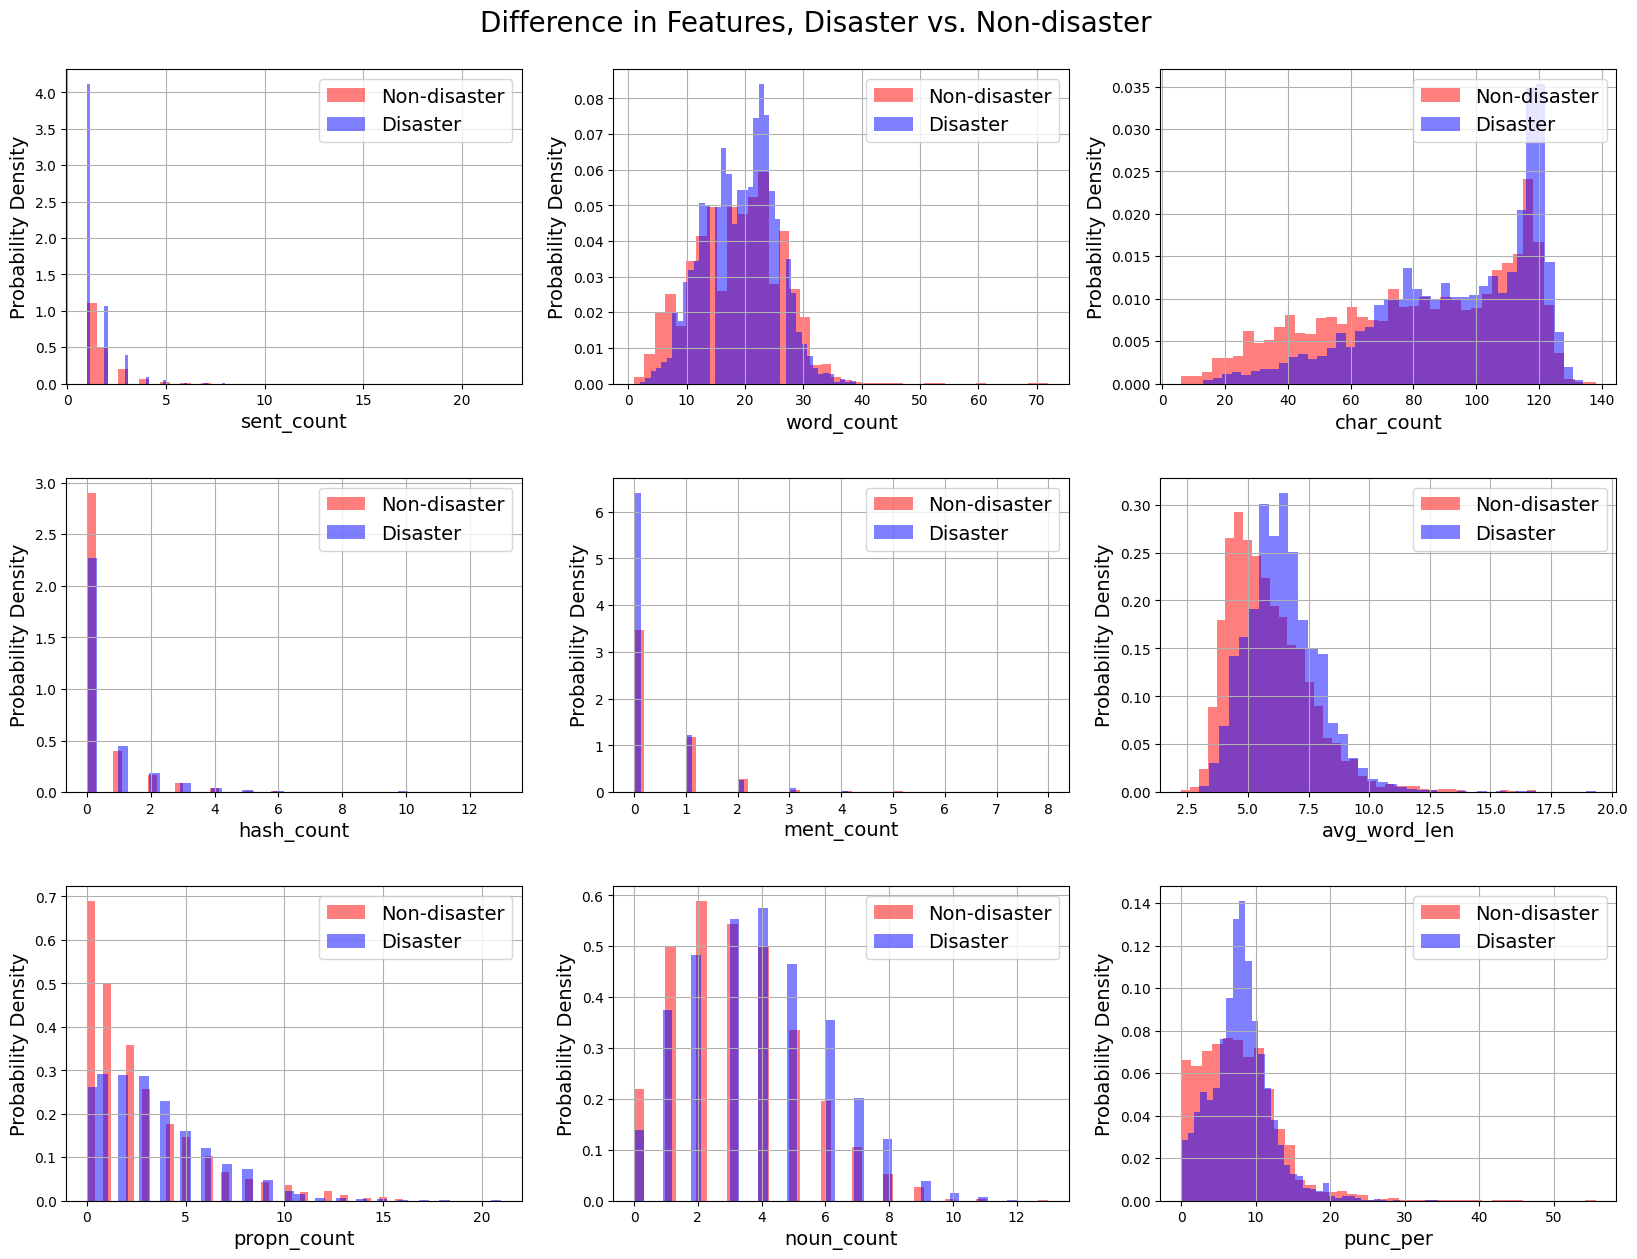

In [ ]:
# Ensure all features exist in the DataFrame
features = ['sent_count', 'word_count', 'char_count', 'hash_count', 'ment_count', 'all_caps_count',
            'avg_word_len', 'propn_count', 'noun_count', 'punc_per']

# Remove features not in the DataFrame
features = [feature for feature in features if feature in train_df.columns]

# Create the figure
fig = plt.figure(figsize=(20, 20))

# Adjust the height of the padding between subplots to avoid overlapping
plt.subplots_adjust(hspace=0.3)

# Add a centered suptitle to the figure
plt.suptitle("Difference in Features, Disaster vs. Non-disaster", fontsize=20, y=0.91)

# Generate the histograms in a for loop
for i, feature in enumerate(features):
    # Add a new subplot iteratively
    ax = plt.subplot(4, 3, i+1)
    train_df[train_df['target'] == 0][feature].hist(alpha=0.5, label='Non-disaster', bins=40, color='red', density=True, ax=ax)
    train_df[train_df['target'] == 1][feature].hist(alpha=0.5, label='Disaster', bins=40, color='blue', density=True, ax=ax)

    # Set x_label, y_label, and legend
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel('Probability Density', fontsize=14)
    ax.legend(loc='upper right', fontsize=14)

# Show the figure
plt.show()


In [ ]:
train_df

,id,keyword,location,text,target,text_cleaned,sent_count,word_count,char_count,hash_count,ment_count,avg_word_len,propn_count,noun_count,punc_per
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive,1,14,57,1,0,4.38,2,2,1.75
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,2,8,32,0,0,4.57,4,2,3.12
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,2,24,112,0,0,5.09,0,7,2.68
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,1,9,57,1,0,7.12,1,4,3.51
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,send photo ruby alaska smoke wildfire pour school,1,18,72,2,0,4.50,2,6,2.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,giant crane hold bridge collapse nearby home,1,13,73,0,0,6.64,0,4,6.85
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,control wild fire california northern state tr...,2,24,106,0,2,5.30,1,4,4.72
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,[: utc s volcano hawaii,2,15,58,0,0,7.25,3,2,18.97
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigate e bike collide car little p...,2,21,119,0,0,6.26,2,7,4.20


We'll use the four features, word_count, char_count, avg_word_len, and punc_per, for our models as they show bigger differences in distributions than other features we've created.
Note: The y-axis in the plots above is probability density, not # of Tweets due to the different size of disaster/non-disaster Tweets.
Now let's move on and start building our models!

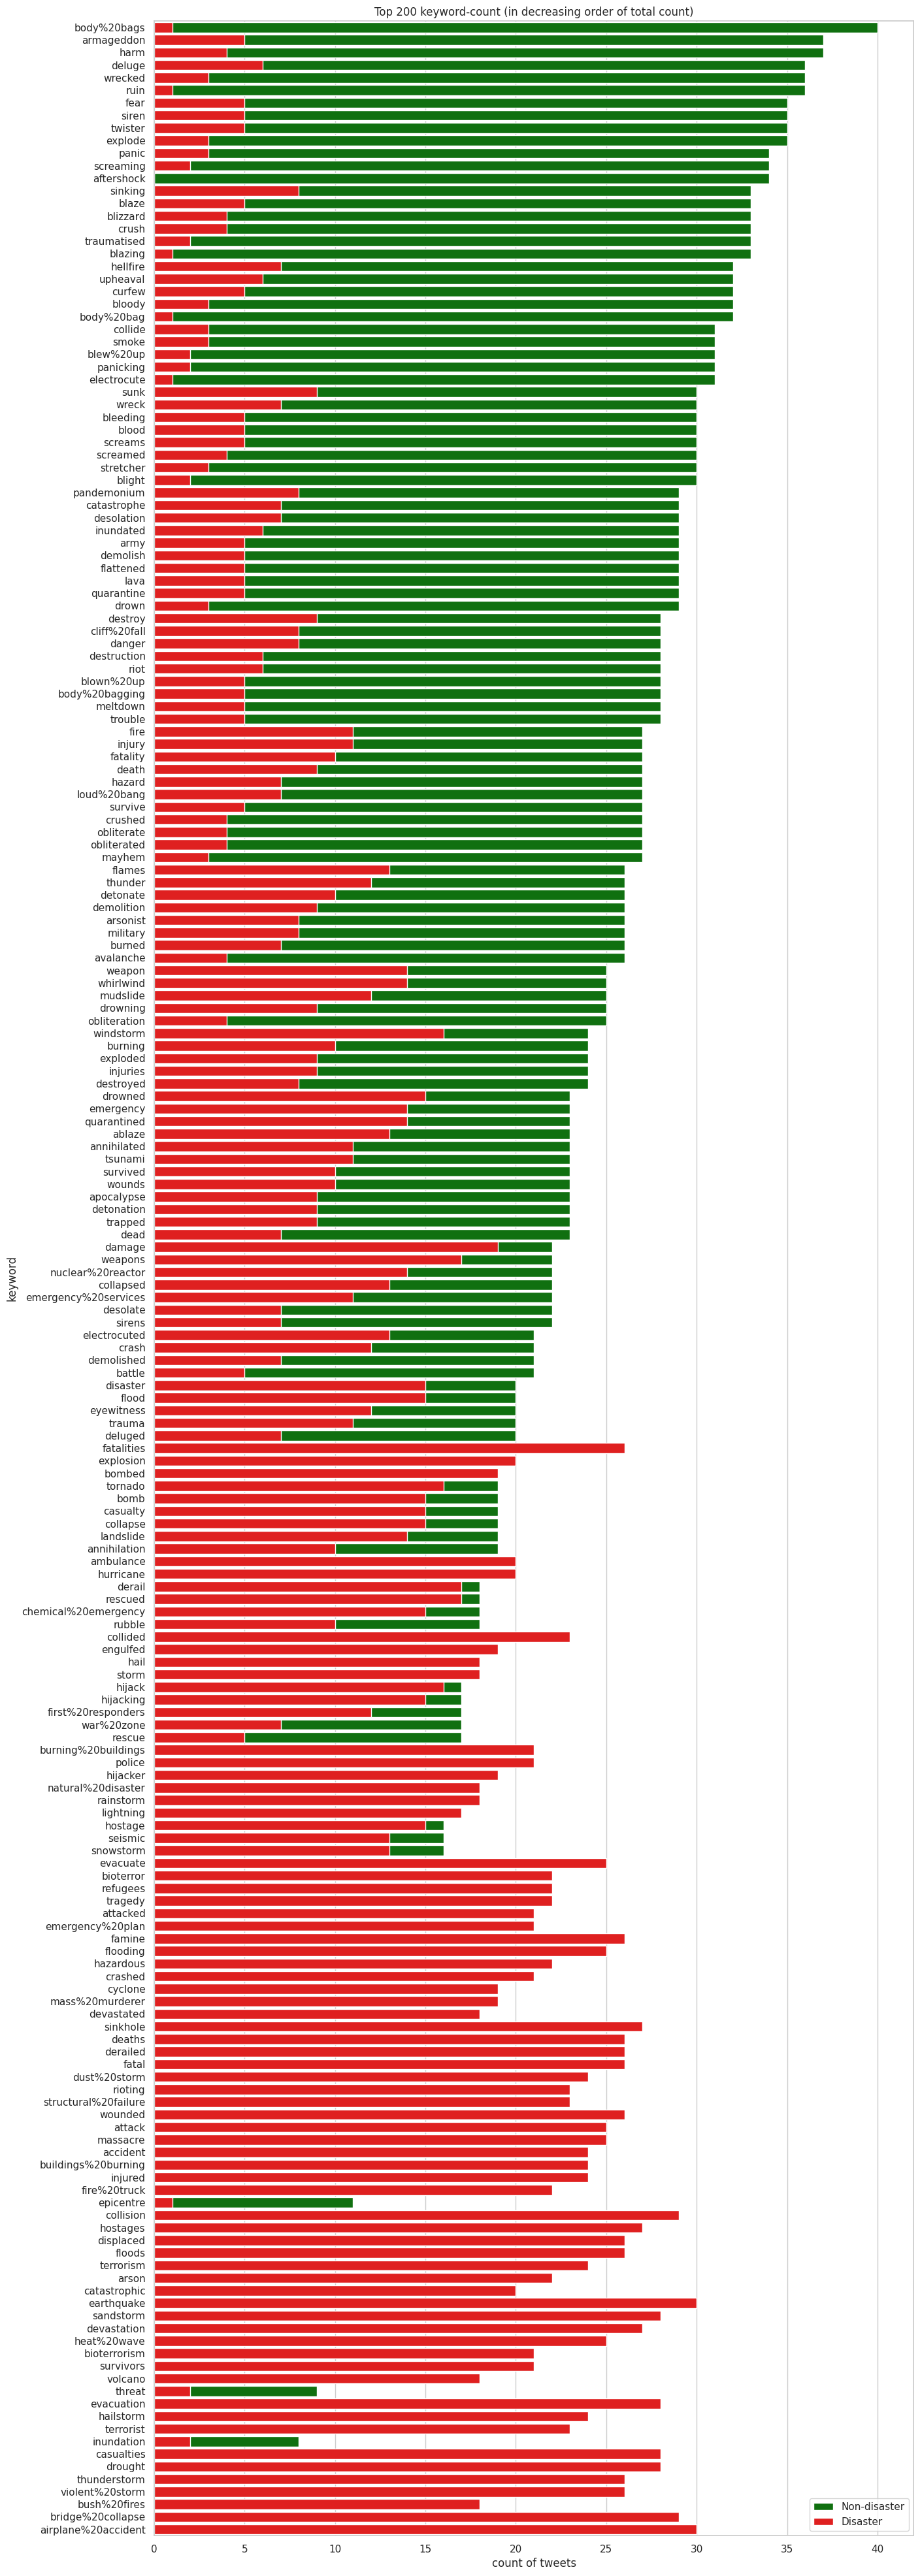

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def donutplot(value, label, color, title):
    plt.pie(value, labels=label, autopct='%1.1f%%', startangle=90, colors=color)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.axis('equal')
    plt.title(title)
    plt.tight_layout()
    plt.show()

def classwise_comparison_barplot(df, n, feature, non_disaster, disaster, xlabel, ylabel, title):
    df_sorted = df.sort_values(by=[non_disaster, disaster], ascending=False)
    df_selected = df_sorted.head(n)
    sns.set(style="whitegrid")
    plt.figure(figsize=(15,50))
    sns.barplot(x=non_disaster, y=feature, data=df_selected, label="Non-disaster", color="green")
    sns.barplot(x=disaster, y=feature, data=df_selected, label="Disaster", color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

def word_counter(text_col, search_word):
    counter = 0
    for text in text_col:
        if search_word in str(text).lower().split():
            counter += 1
    return counter

# Assuming you have 'train_df' loaded with the required columns
keyword_df = train_df.groupby(['keyword', 'target'])['text_cleaned'].count().reset_index()
keyword_df.rename(columns={'text_cleaned': 'count'}, inplace=True)

# Pivot the DataFrame and merge 'target' back for plotting
keyword_df = keyword_df.pivot(index='keyword', columns='target', values='count').reset_index()
keyword_df.fillna(0, inplace=True)
keyword_df.columns = ['keyword', 'count (non-disaster tweets)', 'count (disaster tweets)']
keyword_df['count (all tweets)'] = keyword_df['count (non-disaster tweets)'] + keyword_df['count (disaster tweets)']

classwise_comparison_barplot(df=keyword_df,
                             n=200,  # Adjust for the desired number of top keywords
                             feature='keyword',
                             non_disaster='count (non-disaster tweets)',
                             disaster='count (disaster tweets)',
                             xlabel='count of tweets',
                             ylabel='keyword',
                             title='Top 200 keyword-count (in decreasing order of total count)')

# handling null duplicates


In [ ]:
train_df=train_df.drop(columns='location')

In [ ]:
train_df.dropna(inplace=True)

In [ ]:
train_df.head()

In [ ]:
train_df.isnull().sum()

In [ ]:
train_df.duplicated().sum()

# Model Building

> Add blockquote




In [ ]:
train_df

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 1: Split data into train and test sets before Word2Vec
train_data, test_data = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['target'])

# Step 2: Normalize numerical features (before Word2Vec embeddings)
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
train_data[['sent_count', 'word_count', 'char_count', 'hash_count', 'ment_count',
            'avg_word_len', 'propn_count', 'punc_per']] = scaler.fit_transform(
            train_data[['sent_count', 'word_count', 'char_count', 'hash_count', 'ment_count',
                        'avg_word_len', 'propn_count', 'punc_per']])

test_data[['sent_count', 'word_count', 'char_count', 'hash_count', 'ment_count',
           'avg_word_len', 'propn_count', 'punc_per']] = scaler.transform(
           test_data[['sent_count', 'word_count', 'char_count', 'hash_count', 'ment_count',
                      'avg_word_len', 'propn_count', 'punc_per']])

# Step 3: Tokenize the text_cleaned column (for Word2Vec)
train_data['tokenized_text'] = train_data['text_cleaned'].apply(lambda x: x.split())
test_data['tokenized_text'] = test_data['text_cleaned'].apply(lambda x: x.split())

# Train Word2Vec model on the training data only
w2v_model = Word2Vec(sentences=train_data['tokenized_text'], vector_size=100, window=8, min_count=1, workers=4)

# Generate embeddings by averaging Word2Vec vectors for each row
def get_w2v_vector(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

train_data['w2v_embedding'] = train_data['tokenized_text'].apply(get_w2v_vector)
test_data['w2v_embedding'] = test_data['tokenized_text'].apply(get_w2v_vector)

# Step 4: Convert keywords into numerical form
unique_keywords = train_data['keyword'].unique()
keyword_mapping = {keyword: idx for idx, keyword in enumerate(unique_keywords)}
train_data['keyword_num'] = train_data['keyword'].map(keyword_mapping)
test_data['keyword_num'] = test_data['keyword'].map(keyword_mapping).fillna(-1).astype(int)

# Step 5: Combine features for modeling
X_train_w2v = np.vstack(train_data['w2v_embedding'].values)
X_test_w2v = np.vstack(test_data['w2v_embedding'].values)

# Extract other features (already normalized in Step 2)
X_train_other = train_data[['sent_count', 'word_count', 'char_count', 'hash_count', 'ment_count',
                            'avg_word_len', 'propn_count', 'punc_per', 'keyword_num']].values
X_test_other = test_data[['sent_count', 'word_count', 'char_count', 'hash_count', 'ment_count',
                          'avg_word_len', 'propn_count', 'punc_per', 'keyword_num']].values

# Combine the Word2Vec embeddings with the normalized other features
X_train = np.hstack([X_train_w2v, X_train_other])
X_test = np.hstack([X_test_w2v, X_test_other])

y_train = train_data['target'].values
y_test = test_data['target'].values

# Step 6: Train a model
model = RandomForestClassifier(max_depth=15,random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV with 10 iterations and 3-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model on test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nAccuracy after tuning:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



In [ ]:
test_data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Ensure you have your train-test split data ready
# X_train, X_test, y_train, y_test should be pre-defined
random_state = 42

# Define classifiers
clfs = {
    'MultinomialNB': GaussianNB(),
    'SVC': SVC(random_state=random_state),
    'LogisticRegression': LogisticRegression(max_iter=10000, random_state=random_state),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=random_state),
    'KNeighborsClassifier': KNeighborsClassifier(n_jobs=-1),
    'RandomForestClassifier': RandomForestClassifier(random_state=random_state, n_jobs=-1),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=random_state)
}

# Dictionary to store results
results = {}

# Iterate through classifiers
for name, clf in clfs.items():
    print(f"Training {name}...")

    # Train the model
    clf.fit(X_train, y_train)

    # Predict on test data
    y_pred = clf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Classification Report': class_report,
        'Confusion Matrix': conf_matrix
    }

    # Print metrics
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\nClassification Report:")
    print(class_report)
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("="*50)

# Optional: Convert results to a DataFrame for better visualization
summary_results = pd.DataFrame({
    model: {metric: results[model][metric] for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']}
    for model in results
}).T

print("\nSummary Results:\n", summary_results)

In [ ]:
import joblib

from google.colab import drive
drive.mount('/content/drive')



In [ ]:
# Save the trained model to Google Drive
joblib.dump(model, '/content/drive/My Drive/Colab Notebooks/model.pkl')


In [ ]:
import joblib

# Load the model
model = joblib.load('/content/drive/My Drive/Colab Notebooks/model.pkl')

# Now you can use 'model' for predictions or evaluation



In [ ]:
test_df=test_df.drop(columns='location')

In [ ]:
test_df.dropna(inplace=True)

In [ ]:
test_df.isnull().sum()

In [ ]:
test_df.head()

In [ ]:
# Step 1: Normalize numerical features in test_df (using the scaler fitted on train data)
test_df[['sent_count', 'word_count', 'char_count', 'hash_count', 'ment_count',
         'avg_word_len', 'propn_count', 'punc_per']] = scaler.transform(
         test_df[['sent_count', 'word_count', 'char_count', 'hash_count', 'ment_count',
                  'avg_word_len', 'propn_count', 'punc_per']])

# Step 2: Tokenize the 'text_cleaned' column (for Word2Vec)
test_df['tokenized_text'] = test_df['text_cleaned'].apply(lambda x: x.split())

# Step 3: Generate Word2Vec embeddings for the unseen test data
test_df['w2v_embedding'] = test_df['tokenized_text'].apply(get_w2v_vector)

# Step 4: Convert keywords into numerical form (same as done in training phase)
test_df['keyword_num'] = test_df['keyword'].map(keyword_mapping).fillna(-1).astype(int)

# Step 5: Extract other features for the test data (already normalized)
X_test_w2v_unseen = np.vstack(test_df['w2v_embedding'].values)
X_test_other_unseen = test_df[['sent_count', 'word_count', 'char_count', 'hash_count', 'ment_count',
                                'avg_word_len', 'propn_count', 'punc_per', 'keyword_num']].values

# Combine the Word2Vec embeddings with the normalized other features
X_test_unseen = np.hstack([X_test_w2v_unseen, X_test_other_unseen])

# Step 6: Make predictions using the trained model
y_pred_unseen = model.predict(X_test_unseen)

# Step 7: Output predictions for the unseen test data
test_df['predicted_target'] = y_pred_unseen

# Display the predictions
print(test_df[[ 'predicted_target']].value_counts())


# Building Models¶
